In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [3]:
df=pd.read_csv("c://python//bengaluru.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2=df.drop(["area_type","society","balcony","availability"],axis='columns')

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3=df2.dropna()

In [13]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df3["bhk"]=df3["size"].apply(lambda x:int(x.split(' ')[0]))

C:\Users\hp\AppData\Local\Temp\ipykernel_12332\1383986608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x:int(x.split(' ')[0]))


In [21]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [24]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [26]:
def is_float(x):
    try:
        float(x)

    except:
        return False
    return True


In [27]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [33]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
 convert_sqft_to_num('2166-2188')

2177.0

In [37]:
df4=df3.copy()

In [38]:
df4["total_sqft"]=df4["total_sqft"].apply(lambda x:convert_sqft_to_num(x))

In [40]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [41]:
df5=df4.copy()

In [42]:
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [50]:
df5["price_per_sqft"]=(df5["price"]*100000/df5["total_sqft"])

In [51]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [55]:
df5.head(400)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
399,Chandapura,3 BHK,1208.0,3.0,45.00,3,3725.165563
400,Whitefield,3 BHK,1910.0,3.0,161.00,3,8429.319372
401,Whitefield,4 BHK,3252.0,4.0,230.00,4,7072.570726
402,Battarahalli,2 Bedroom,1200.0,2.0,65.00,2,5416.666667


In [80]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Yeshwant

In [81]:
df5.location=df5.location.apply(lambda x:x.strip())

In [82]:
location_stats=df5.groupby("location")["location"].agg('count').sort_values(ascending=False)

In [92]:
location_stats.head(20)

location
other                       2896
Whitefield                   534
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               266
Thanisandra                  233
Yelahanka                    210
Uttarahalli                  186
Hebbal                       176
Marathahalli                 175
Raja Rajeshwari Nagar        171
Bannerghatta Road            152
Hennur Road                  150
7th Phase JP Nagar           149
Haralur Road                 141
Electronic City Phase II     131
Rajaji Nagar                 106
Chandapura                    98
Bellandur                     96
KR Puram                      88
Name: location, dtype: int64

In [93]:
len(location_stats)

242

In [94]:
len(location_stats[location_stats<=10])

0

In [95]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [96]:
location_stats_less_than_10

Series([], Name: location, dtype: int64)

In [97]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [98]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [99]:
len(df.location.unique())

272

In [100]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [102]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [103]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [104]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [105]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [107]:
mean=df6.price_per_sqft.mean()
std=df6.price_per_sqft.std()

In [108]:
df6["Z SCORE"]=df6.price_per_sqft.apply(lambda x:(x-mean)/std)

C:\Users\hp\AppData\Local\Temp\ipykernel_12332\538999273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Z SCORE"]=df6.price_per_sqft.apply(lambda x:(x-mean)/std)


In [109]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z SCORE
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,-0.625867
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,-0.406206
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,-0.480539
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,-0.015022
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,-0.493868
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,0.091488
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111,1.152222
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,-0.251902
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,0.983375


In [121]:
len(df6[(df6["Z SCORE"]<=1) & (df6["Z SCORE"]>=-1)])

11294

In [122]:
len(df6)

12502

In [123]:
df7=(df6[(df6["Z SCORE"]<=1) & (df6["Z SCORE"]>=-1)])

In [124]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z SCORE
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,-0.625867
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,-0.406206
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,-0.480539
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,-0.015022
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,-0.493868
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245,0.053288
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,0.091488
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,-0.251902
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,0.983375


In [130]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="green",label="3 BHK",s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per sqft")
    plt.title(location)
    plt.legend()

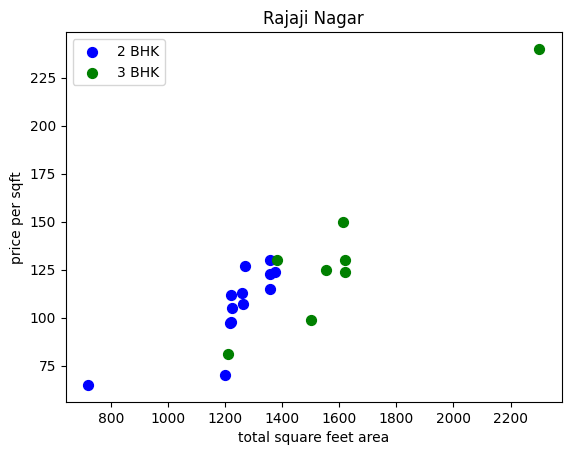

In [131]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [132]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[ bhk_df.price_per_sqft < stats['mean'] ].index.values
                )
    return df.drop(exclude_indices, axis='index')


In [133]:
df8=remove_bhk_outliers(df7)

In [135]:
df8.shape

(8119, 8)

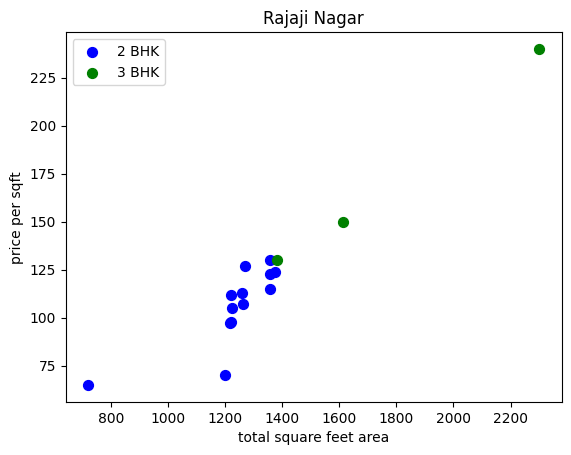

In [137]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

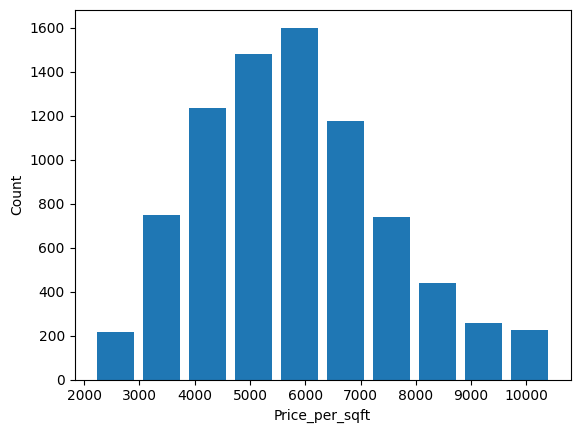

In [140]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price_per_sqft")
plt.ylabel("Count")

In [143]:
df8.bath.unique()

array([ 2.,  3.,  4.,  1.,  8.,  6.,  5.,  7.,  9., 12., 16., 10., 13.])

In [144]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z SCORE
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000,-0.463878
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,-0.193973
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000,-0.913720
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,-0.553847
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424,-0.297347


(array([5.327e+03, 1.923e+03, 7.260e+02, 9.000e+01, 3.900e+01, 7.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

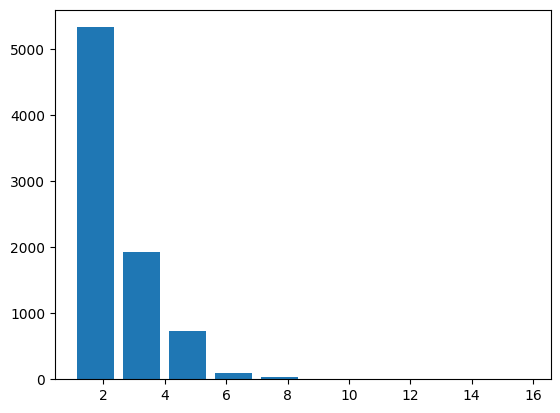

In [145]:
plt.hist(df8.bath,rwidth=0.8)

In [148]:
df9=df8[df8.bath<df8.bhk+2]

In [149]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z SCORE
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,-0.625867
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,-0.480539
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,-0.015022
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,-0.493868
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,0.277956
...,...,...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.918216,-0.496766
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245,0.053288
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,-0.251902
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,0.983375


In [150]:
df9.shape

(8039, 8)

In [151]:
df10=df9.drop(["price_per_sqft","size","Z SCORE"],axis='columns')

In [152]:
df10

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3
13314,Green Glen Layout,1715.0,3.0,112.00,3
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [153]:
dummies=pd.get_dummies(df10.location)

In [154]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
dummies=dummies.replace({True:1,False:0})

C:\Users\hp\AppData\Local\Temp\ipykernel_12332\138422860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummies=dummies.replace({True:1,False:0})


In [162]:
df11=pd.concat([df10,dummies.drop("other",axis="columns")],axis='columns')

In [163]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df12=df11.drop("location",axis='columns')

In [167]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1345.0,2.0,57.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,1715.0,3.0,112.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1141.0,2.0,60.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,488.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
x=df12.drop("price",axis='columns')

In [169]:
y=df12["price"]


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
model=LinearRegression()

In [174]:
model.fit(x_train,y_train)

LinearRegression()

In [175]:
model.predict(x_test)

array([48.96095217, 69.56375821, 23.77119225, ..., 57.08569838,
       50.66495878, 42.30024812], shape=(1608,))

In [176]:
y_test

8584      43.00
6378      35.00
12361     25.40
303      100.00
3010     280.00
          ...  
5143     285.00
11252     69.46
16        48.00
4711      45.00
9405      37.00
Name: price, Length: 1608, dtype: float64

In [177]:
model.score(x_test,y_test)

0.9101388578994214

In [178]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [179]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [180]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.91013886, 0.82736701, 0.85866106, 0.8395134 , 0.86964431])

In [182]:
from sklearn.model_selection import GridSearchCV

In [186]:
from sklearn.linear_model import Lasso

In [194]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
           
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [200]:
 find_best_model_using_gridsearchcv(x, y)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 436,

,model,best_score,best_params
0,linear_regression,0.861065,{}
1,lasso,0.835095,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.757290,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [202]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1

    return model.predict([a])[0]


In [205]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(76.56096593356936)

In [209]:
import pickle
with open('c://python//bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [212]:
import json
columns={'data_columns':[col.lower() for col in x.columns]
        }
with open("c://python//columns.json","w") as f:
    f.write(json.dumps(columns))